In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
from sklearn.model_selection import train_test_split, GridSearchCV
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import to_categorical
from keras import backend as K
K.set_image_data_format('channels_first')

2024-04-17 17:05:42.055146: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-17 17:05:42.055252: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-17 17:05:42.165250: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [2]:
clss = ["axe","backpack","anvil","belt","bicycle","bridge","dragon","fire hydrant","hammer","guitar","helicopter","horse","ladder","key","knife","parachute","rifle","saw","stairs","sword"]

In [3]:
# Load the data
loaded_data = {}
# x = np.load('/kaggle/input/quick-draw-20-npy/Sketch/{i}.npy')
# print("/kaggle/input/quick-draw-20-npy/Sketch/",i,".npy")
for i in clss:
    loaded_data[i] = np.load('/kaggle/input/quick-draw-20-npy/Sketch/'+i+'.npy')
    print(loaded_data[i].shape)
    
print(loaded_data['axe'])

(124122, 784)
(125801, 784)
(126231, 784)
(191119, 784)
(126527, 784)
(133010, 784)
(124362, 784)
(137242, 784)
(119012, 784)
(120451, 784)
(159938, 784)
(178286, 784)
(125389, 784)
(160965, 784)
(172656, 784)
(127319, 784)
(172444, 784)
(121256, 784)
(128981, 784)
(123802, 784)
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [4]:
# Label data
x = 0
for i in clss:
    loaded_data[i] = np.c_[loaded_data[i], x*np.ones(len(loaded_data[i]))]
    x += 1
    
# cat = np.c_[cat, np.zeros(len(cat))]
# giraffe = np.c_[giraffe, np.ones(len(giraffe))]
# sheep = np.c_[sheep, 2*np.ones(len(sheep))]
# bat = np.c_[bat, 3*np.ones(len(bat))]
# octopus = np.c_[octopus, 4*np.ones(len(octopus))]
# camel = np.c_[camel, 5*np.ones(len(camel))]

In [5]:
def plot_samples(input_array, rows=4, cols=5, title=''):
    '''
    Function to plot 28x28 pixel drawings that are stored in a numpy array.
    Specify how many rows and cols of pictures to display (default 4x5).  
    If the array contains less images than subplots selected, surplus subplots remain empty.
    '''
    fig, ax = plt.subplots(figsize=(cols,rows))
    ax.axis('off')
    plt.title(title)

    for i in list(range(0, min(len(input_array),(rows*cols)) )):      
        a = fig.add_subplot(rows,cols,i+1)
        imgplot = plt.imshow(input_array[i,:784].reshape((28,28)), cmap='gray_r', interpolation='nearest')
        plt.xticks([])
        plt.yticks([])

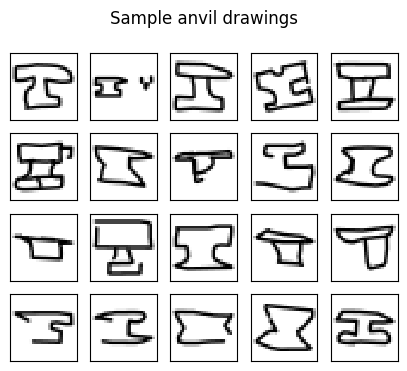

In [6]:
plot_samples(loaded_data["anvil"], title='Sample anvil drawings\n')

In [7]:
# Merging arrays and splitting the features and labels
# X = np.empty(20)
# X = np.concatenate((loaded_data["anvil"][:-10000, :-1]), axis = 0).astype('float32')
c = []
d = []
for i in clss:
    c.append(loaded_data[i][:40000,:-1])
    d.append(loaded_data[i][:40000,-1])
 
X = np.concatenate(c, axis = 0).astype('float32')
y = np.concatenate(d, axis = 0).astype('float32')
print(X.shape)

# We than split data between train and test (80 - 20 usual ratio). Normalizing the value between 0 and 1
X_train, X_test, y_train, y_test = train_test_split(X/255.,y,test_size=0.2,random_state=0)

(800000, 784)


In [8]:
# One hot encode outputs
y_train_cnn = to_categorical(y_train)
y_test_cnn = to_categorical(y_test)
num_classes = y_test_cnn.shape[1]

In [9]:
# Reshape to be [samples][pixels][width][height]
X_train_cnn = X_train.reshape(X_train.shape[0], 1, 28, 28).astype('float32')
X_test_cnn = X_test.reshape(X_test.shape[0], 1, 28, 28).astype('float32')

In [10]:
def cnn_model():
    # create model
    model = Sequential()
    model.add(Conv2D(30, (3, 3), input_shape=(1, 28, 28), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(15, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.2))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dense(50, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [11]:
%%time
np.random.seed(0)
# Build the model
model_cnn = cnn_model()
model_cnn.summary()
# Fit the model
model_cnn.fit(X_train_cnn, y_train_cnn, validation_data=(X_test_cnn, y_test_cnn), epochs=100, batch_size=200)
# Final evaluation of the model
scores = model_cnn.evaluate(X_test_cnn, y_test_cnn, verbose=0)
print('Final CNN accuracy: ', scores[1])

/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 26, 26)     │           300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 30, 13, 13)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 15, 11, 11)     │         4,065 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 15, 5, 5)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 15, 5, 5)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 375)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │        48,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 50)             │         6,450 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 20)             │         1,020 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 59,963 (234.23 KB)

 Trainable params: 59,963 (234.23 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
  38/3200 ━━━━━━━━━━━━━━━━━━━━ 13s 4ms/step - accuracy: 0.1046 - loss: 2.9089 

I0000 00:00:1713373605.747500      86 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


3200/3200 ━━━━━━━━━━━━━━━━━━━━ 19s 4ms/step - accuracy: 0.6658 - loss: 1.1474 - val_accuracy: 0.8374 - val_loss: 0.5753
Epoch 2/100
3200/3200 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.8244 - loss: 0.6151 - val_accuracy: 0.8566 - val_loss: 0.5069
Epoch 3/100
3200/3200 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.8424 - loss: 0.5513 - val_accuracy: 0.8618 - val_loss: 0.4845
Epoch 4/100
3200/3200 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.8526 - loss: 0.5148 - val_accuracy: 0.8694 - val_loss: 0.4602
Epoch 5/100
3200/3200 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.8565 - loss: 0.4990 - val_accuracy: 0.8711 - val_loss: 0.4515
Epoch 6/100
3200/3200 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.8623 - loss: 0.4806 - val_accuracy: 0.8773 - val_loss: 0.4309
Epoch 7/100
3200/3200 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.8640 - loss: 0.4704 - val_accuracy: 0.8779 - val_loss: 0.4281
Epoch 8/100
3200/3200 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.8664 - loss: 0.462

In [19]:
y_pred_probabilities = model_cnn.predict(X_test_cnn, verbose=0)
y_pred_classes = np.argmax(y_pred_probabilities, axis=1)

In [13]:
from sklearn import metrics
c_matrix = metrics.confusion_matrix(y_test, y_pred_classes)
print(c_matrix)

[[6746   50   17   13    6   26   78   80  704    7   14   14   47   30
    92   25   54   13   11   37]
 [  22 7529    5   25   15   15   54  124    5   11   15    4    8    8
    10   31    9    9    7    3]
 [  11   46 7214   47   12   46   99  114   60    3  110   23    8   14
    37   33   94   23   28   16]
 [  23   84   28 6724   17  156  116   87   17   18   85   14   16   32
   163   56  209   44    9   46]
 [   1   18    3    6 7791   12   69   26    2    8   38   21    3   13
     1    2   10    4    1    4]
 [  10   18   20  110   20 7033  157   67    9   10   46   42   30   15
    17   60  106   80    7   15]
 [  35   42   12   21   29   75 6854  119   35   42  149  292    5   42
    24   17   46   58   11   17]
 [  73  173   33   32   33   58  279 6684  148   18   77   35   21   60
    38   34   45   12   19   42]
 [ 504   18   22   15    8   16   75   73 7024    1   20   22    4   22
    33   28   70   11    6   25]
 [   8   15    3   25    6    9  100   64    2 7421   2

In [14]:
import seaborn as sns
def confusion_matrix(confusion_matrix, class_names, figsize = (10,7), fontsize=14):
    """Prints a confusion matrix, as returned by sklearn.metrics.confusion_matrix, as a heatmap.
    
    Arguments
    ---------
    confusion_matrix: numpy.ndarray
        The numpy.ndarray object returned from a call to sklearn.metrics.confusion_matrix. 
        Similarly constructed ndarrays can also be used.
    class_names: list
        An ordered list of class names, in the order they index the given confusion matrix.
    figsize: tuple
        A 2-long tuple, the first value determining the horizontal size of the ouputted figure,
        the second determining the vertical size. Defaults to (10,7).
    fontsize: int
        Font size for axes labels. Defaults to 14.
    """
    df_cm = pd.DataFrame(
        confusion_matrix, index=class_names, columns=class_names, 
    )
    fig = plt.figure(figsize=figsize)
    try:
        heatmap = sns.heatmap(df_cm, annot=True, fmt="d")
    except ValueError:
        raise ValueError("Confusion matrix values must be integers.")
    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=fontsize)
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=fontsize)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

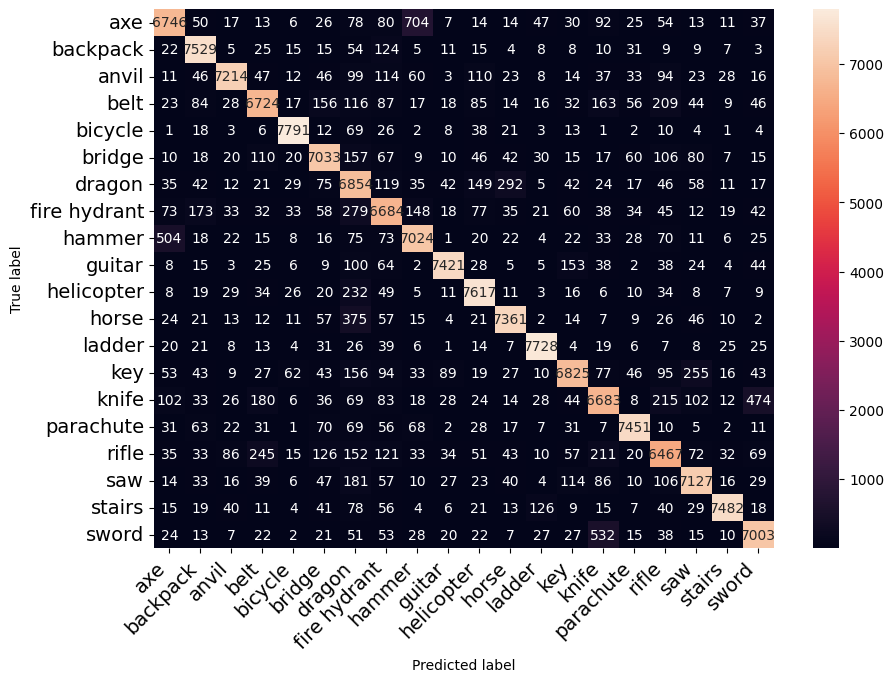

In [15]:
class_names = clss
confusion_matrix(c_matrix, class_names, figsize = (10,7), fontsize=14)

In [16]:
# Misclassification when y_pred and y_test are different.
misclassified = X_test[y_pred_classes != y_test]

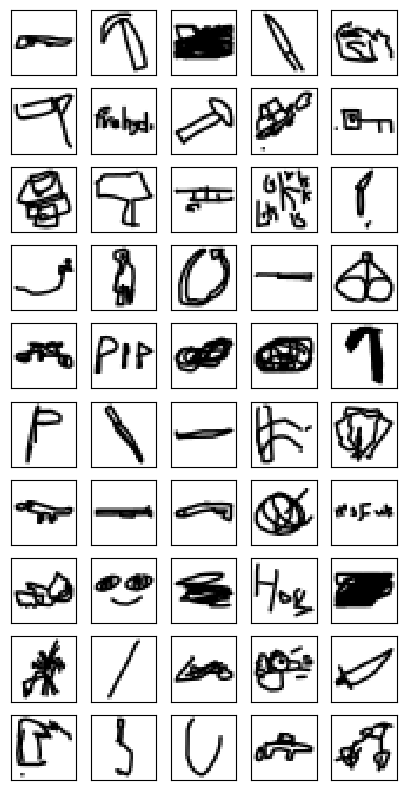

In [17]:
plot_samples(misclassified, rows=10, cols=5, title='')

In [18]:
model_cnn.save("QuickDraw.h5")